In [8]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

<Axes: >

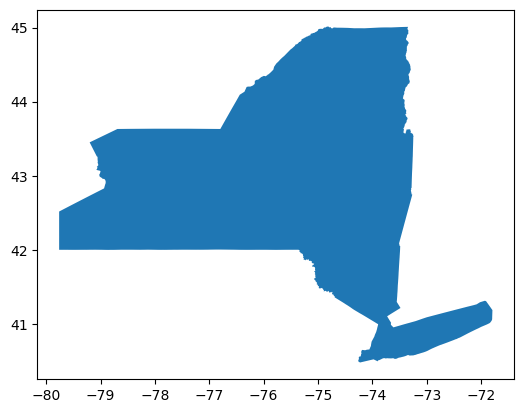

In [12]:
ny_state_area.plot()

    Feature  Importance
1  Feature2    0.472691
3  Feature4    0.184801
0  Feature1    0.183849
2  Feature3    0.094009
4  Feature5    0.064650


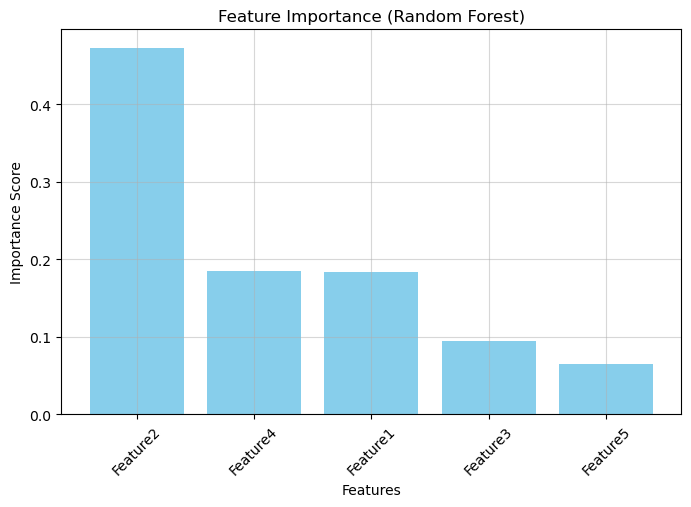

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 生成示例数据
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']

# 随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 获取特征重要性
importance = rf.feature_importances_

# 转为 DataFrame，方便排序和展示
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(importance_df)

# 可视化特征重要性
plt.figure(figsize=(8, 5))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dataembassy/nyc-borough-boundaries")

print("Path to dataset files:", path)

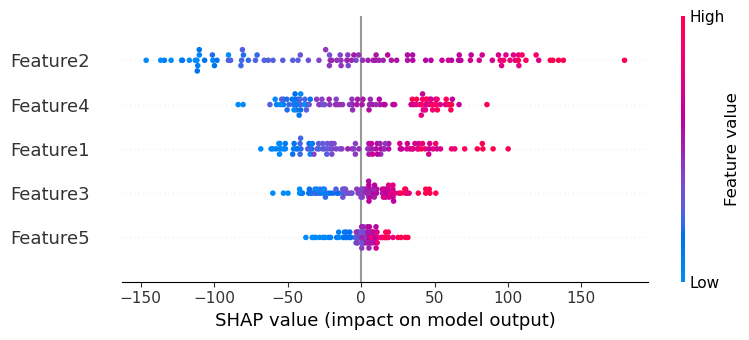

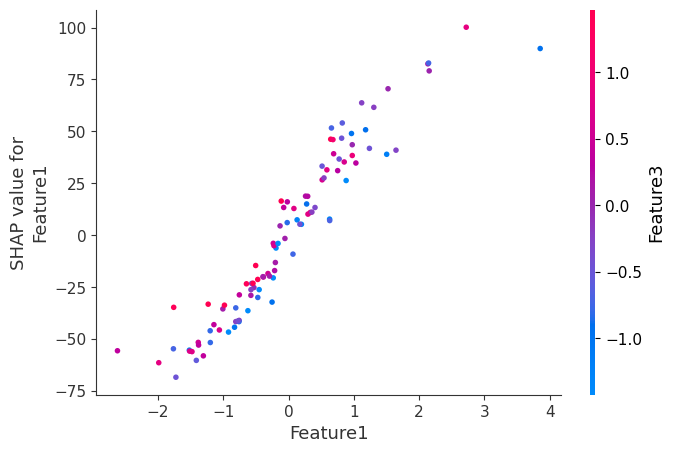

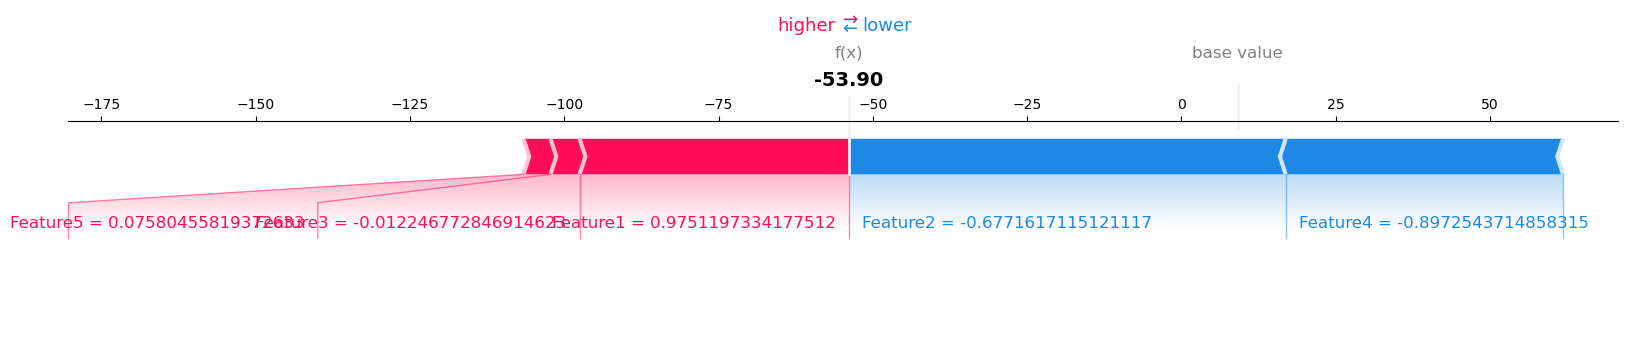

In [16]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# 生成示例数据
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
X = pd.DataFrame(X, columns=feature_names)

# 训练随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 计算 SHAP 值
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# 1. 绘制 Summary Plot
shap.summary_plot(shap_values, X, feature_names=feature_names)

# 2. 绘制单个特征的 Dependence Plot
shap.dependence_plot("Feature1", shap_values, X)

# 3. 绘制单个样本的 Force Plot
sample_index = 0  # 选择某个样本
shap.force_plot(
    explainer.expected_value, shap_values[sample_index, :], X.iloc[sample_index, :],
    matplotlib=True
)


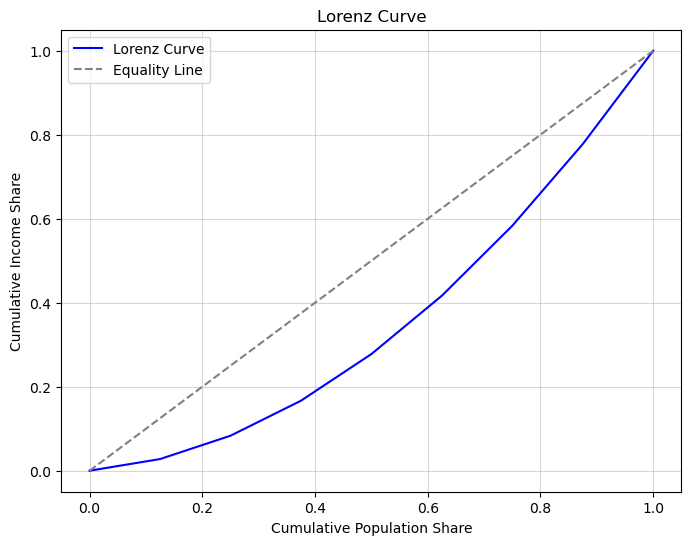

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据：收入分布
income = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])

# 步骤1：排序数据
income_sorted = np.sort(income)

# 步骤2：计算累积值
cumulative_income = np.cumsum(income_sorted)
total_income = cumulative_income[-1]

# 步骤3：计算累积比例
population_share = np.linspace(0, 1, len(income) + 1)  # 人口累积比例
income_share = np.insert(cumulative_income / total_income, 0, 0)  # 收入累积比例

# 步骤4：绘制洛伦兹曲线
plt.figure(figsize=(8, 6))
plt.plot(population_share, income_share, label="Lorenz Curve", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Equality Line")  # 完全平等线
plt.title("Lorenz Curve")
plt.xlabel("Cumulative Population Share")
plt.ylabel("Cumulative Income Share")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


Weighted Gini Coefficient: 0.516


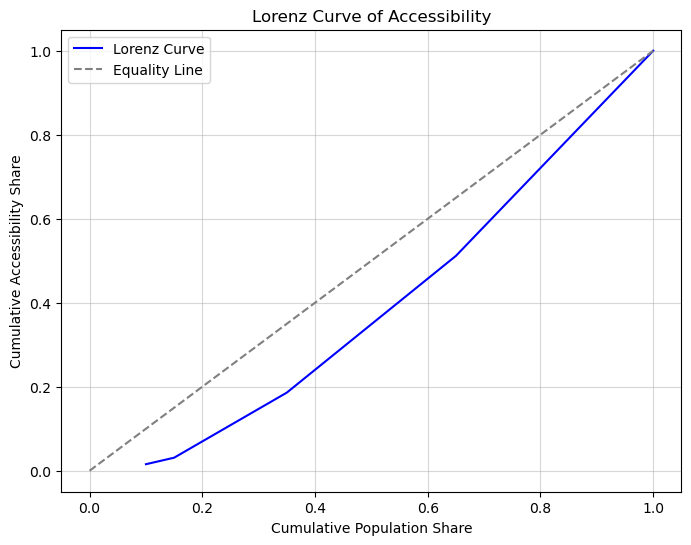

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def weighted_gini(accessibility, population):
    """
    计算加权基尼系数
    :param accessibility: 一维数组，表示交通可达性系数
    :param population: 一维数组，表示每个地区的人口数量
    :return: 加权基尼系数
    """
    # 根据交通可达性排序
    sorted_indices = np.argsort(accessibility)
    accessibility = accessibility[sorted_indices]
    population = population[sorted_indices]
    
    # 累积值
    cum_population = np.cumsum(population)
    total_population = cum_population[-1]
    cum_population_ratio = cum_population / total_population
    
    cum_accessibility = np.cumsum(accessibility * population)
    total_accessibility = cum_accessibility[-1]
    cum_accessibility_ratio = cum_accessibility / total_accessibility
    
    # 计算基尼系数
    gini = 1 - 2 * np.sum(cum_accessibility_ratio[:-1] * np.diff(cum_population_ratio))
    return gini, cum_population_ratio, cum_accessibility_ratio

def plot_lorenz_curve(cum_population_ratio, cum_accessibility_ratio):
    """
    绘制洛伦兹曲线
    :param cum_population_ratio: 累积人口比例
    :param cum_accessibility_ratio: 累积可达性比例
    """
    plt.figure(figsize=(8, 6))
    plt.plot(cum_population_ratio, cum_accessibility_ratio, label="Lorenz Curve", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Equality Line")  # 完全平等线
    plt.title("Lorenz Curve of Accessibility")
    plt.xlabel("Cumulative Population Share")
    plt.ylabel("Cumulative Accessibility Share")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

# 示例数据
accessibility = np.array([0.1, 0.5, 0.2, 0.7, 0.9])  # 可达性系数
population = np.array([100, 200, 50, 300, 350])      # 人口

# 计算基尼系数和累积比例
gini, cum_population_ratio, cum_accessibility_ratio = weighted_gini(accessibility, population)
print(f"Weighted Gini Coefficient: {gini:.3f}")

# 绘制洛伦兹曲线
plot_lorenz_curve(cum_population_ratio, cum_accessibility_ratio)


拓扑错误： {'self_intersections': [], 'dangling_nodes': [3, 4, 5, 6, 11, 11, 12, 12, 13, 14, 15, 15, 16, 17, 17, 18, 19, 19, 20, 20, 21, 21, 22, 22, 24, 25, 25, 26, 26, 29, 29, 30, 30, 32, 33, 33, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 40, 41, 41, 42, 43, 43, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 54, 54, 57, 58, 59, 60, 61, 62, 63, 65, 69, 71, 72, 74, 75, 76, 81, 81, 82, 82, 84, 85, 86, 87, 87, 89, 89, 90, 90, 91, 91, 92, 92, 93, 94, 94, 96, 96, 97, 97, 98, 99, 99, 100, 101, 102, 102, 103, 104, 105, 105, 106, 106, 107, 108, 109, 109, 110, 111, 112, 113, 113, 114, 115, 115, 116, 116, 117, 117, 118, 119, 120, 121, 121, 122, 122, 123, 123, 124, 125, 125, 126, 126, 127, 127, 128, 129, 129, 130, 131, 131, 132, 132, 133, 133, 134, 136, 136, 137, 137, 138, 138, 139, 139, 140, 141, 141, 142, 142, 143, 144, 144, 145, 146, 146, 147, 149, 150, 150, 151, 151, 152, 152, 154, 154, 155, 155, 156, 157, 157, 158, 160, 161, 161, 162, 162, 163, 164, 165, 165, 166, 166, 167, 167, 168, 168, 169, 170,

d:\Anaconda\envs\pytorchEnv\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from current font.
  plt.draw()
d:\Anaconda\envs\pytorchEnv\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 22797 (\N{CJK UNIFIED IDEOGRAPH-590D}) missing from current font.
  plt.draw()
d:\Anaconda\envs\pytorchEnv\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  plt.draw()
d:\Anaconda\envs\pytorchEnv\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.draw()
d:\Anaconda\envs\pytorchEnv\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from current font.
  plt.draw()
d:\Anaconda\envs\pytorchEnv\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from c

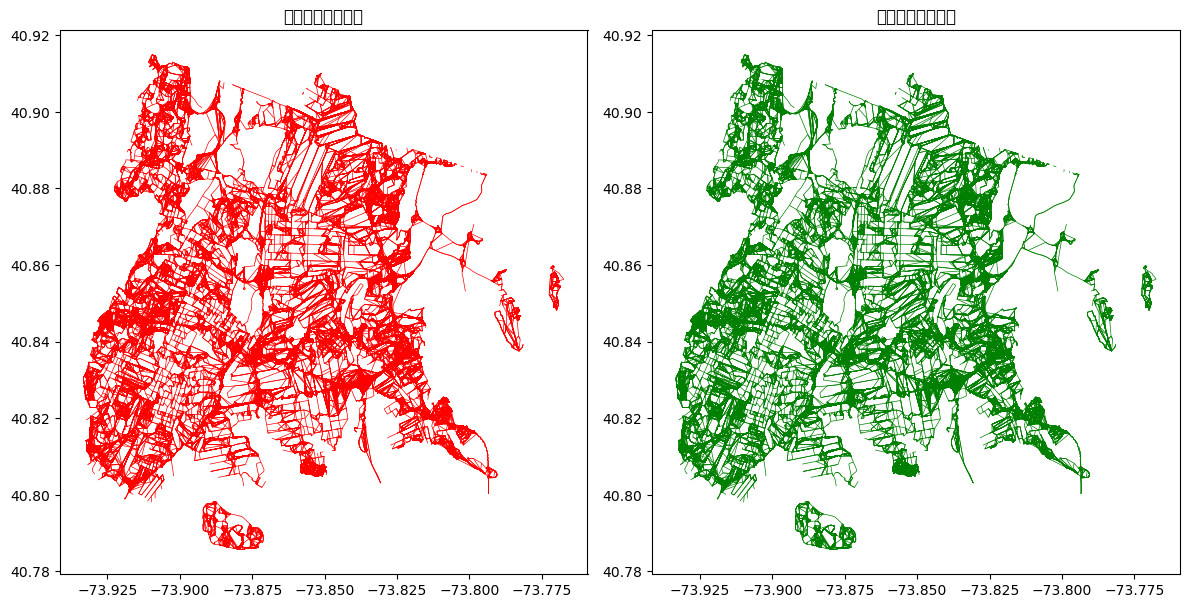

In [1]:
import geopandas as gpd
from shapely.geometry import LineString
from shapely.ops import snap, linemerge
import matplotlib.pyplot as plt

# 加载路网数据
input_file = "D:/下载/tl_2024_36005_roads/tl_2024_36005_roads.shp"
roads = gpd.read_file(input_file)

# 检查拓扑错误
def check_topology_errors(gdf):
    errors = {
        "self_intersections": [],
        "dangling_nodes": [],
    }
    for idx, geom in gdf.geometry.items():
        if not geom.is_simple:
            errors["self_intersections"].append(idx)
        # 检查悬挂节点（终点和起点是否孤立）
        if geom.boundary.geom_type == 'MultiPoint':
            endpoints = list(geom.boundary.geoms)  # 使用 .geoms 获取子几何
        elif geom.boundary.geom_type == 'Point':
            endpoints = [geom.boundary]
        else:
            continue  # 忽略无效几何
        for pt in endpoints:
            if sum(other_geom.contains(pt) for other_geom in gdf.geometry) == 1:
                errors["dangling_nodes"].append(idx)
    return errors

errors = check_topology_errors(roads)
print("拓扑错误：", errors)

# 修复拓扑错误
def fix_topology_errors(gdf):
    fixed_geometries = []
    for geom in gdf.geometry:
        # 修复自相交
        if not geom.is_simple:
            geom = geom.buffer(0)
        # 修复悬挂节点：通过捕捉到最近的线
        geom = snap(geom, linemerge(gdf.unary_union), tolerance=0.001)
        fixed_geometries.append(geom)
    gdf["geometry"] = fixed_geometries
    return gdf

roads_fixed = fix_topology_errors(roads)

# 可视化修复前后的对比
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 修复前
roads.plot(ax=axes[0], color="red", linewidth=0.5)
axes[0].set_title("修复前的路网数据")

# 修复后
roads_fixed.plot(ax=axes[1], color="green", linewidth=0.5)
axes[1].set_title("修复后的路网数据")

plt.tight_layout()
plt.show()


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("skhiearth/nyc-borough-boundaries")

print("Path to dataset files:", path)

100%|██████████| 831k/831k [00:00<00:00, 1.10MB/s]

Extracting files...
Path to dataset files: C:\Users\CHEN YP\.cache\kagglehub\datasets\skhiearth\nyc-borough-boundaries\versions\1


#### The Boundaries of Boroughs in NYC

First, before we access and preprocess the NYC [boroughs boundaries](https://www.kaggle.com/datasets/dataembassy/nyc-borough-boundaries#) data via Kagglehub, please make sure you have installed the `kagglehub` Python package in your environment, which is an open-source tool that can download public Kaggle datasets directly to your working directory.

In [14]:
# 导入所需库
import kagglehub
import shutil
import os


# Download the dataset to a temporary directory
path = kagglehub.dataset_download("dataembassy/nyc-borough-boundaries")

# Find the NYC Boroughs Boundaries shapefile
shapefile_path = ""
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".shp"):
            shapefile_path = os.path.join(root, file)
            break

# Load the shapefile as a GeoDataFrame
NYC_borough = gpd.read_file(shapefile_path)


# Delete the temporary directory and its files
file_dir_path = os.path.dirname(path)
file_dir_path = os.path.dirname(file_dir_path)
file_dir_path = os.path.dirname(file_dir_path)
shutil.rmtree(file_dir_path)

# Drop unnecessary columns
NYC_borough = NYC_borough.drop(columns=["Shape_Leng", "Shape_Area"])
display(NYC_borough.head())
print("shape:", NYC_borough.shape)

100%|██████████| 640k/640k [00:00<00:00, 1.33MB/s]

Extracting files...


,BoroCode,BoroName,geometry
0,5,Staten Island,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,2,Bronx,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
2,4,Queens,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
3,3,Brooklyn,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,1,Manhattan,"MULTIPOLYGON (((981219.056 188655.316, 980940...."


shape: (5, 3)


**Metadata of the pre-processed NYC boroughs boundaries**

- number of rows: 5
- number of columns: 3
- Fields:

|Name|Data Type|Description|
|---|---|---|
|BoroCode|Integer|Borough Code|
|BoroName|String|Borough Name|
|geometry|geometry|multipolygon|

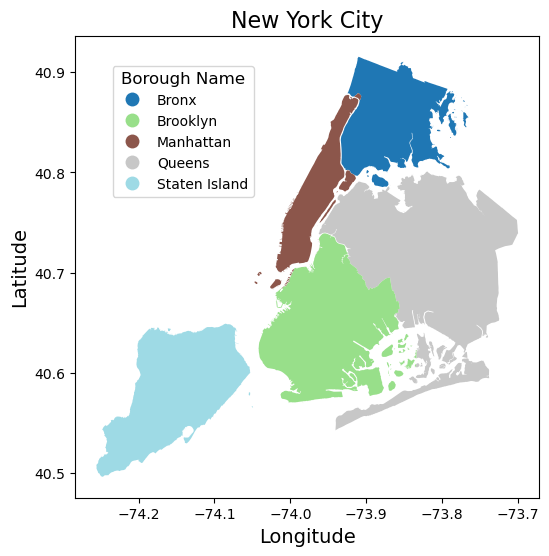

In [17]:
# Visualize the NYC Boroughs
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
NYC_borough.to_crs(epsg=4326).plot(column='BoroName', legend=True, ax=ax, cmap='tab20')
plt.title("New York City", fontsize=16)
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.4, 0.95))
legend.set_title("Borough Name", prop={"size": 12})
for text in legend.get_texts():
    text.set_fontsize(10)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.show()